In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

C:\Users\GT\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\GT\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
pip install gc

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement gc (from versions: )
No matching distribution found for gc


In [6]:
url='https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/blob/master/ibm-hr-analytics-employee-attrition-performance.zip'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

ParserError: Error tokenizing data. C error: Expected 1 fields in line 47, saw 2


In [4]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

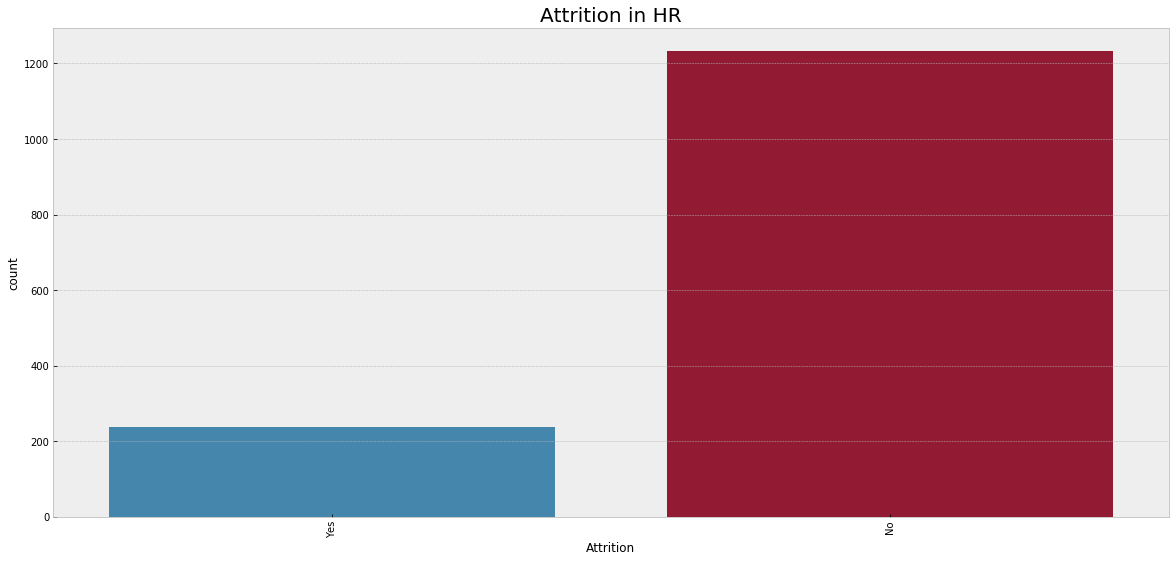

In [9]:

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('bmh')

sns.countplot(df['Attrition'])

plt.title('Attrition in HR', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

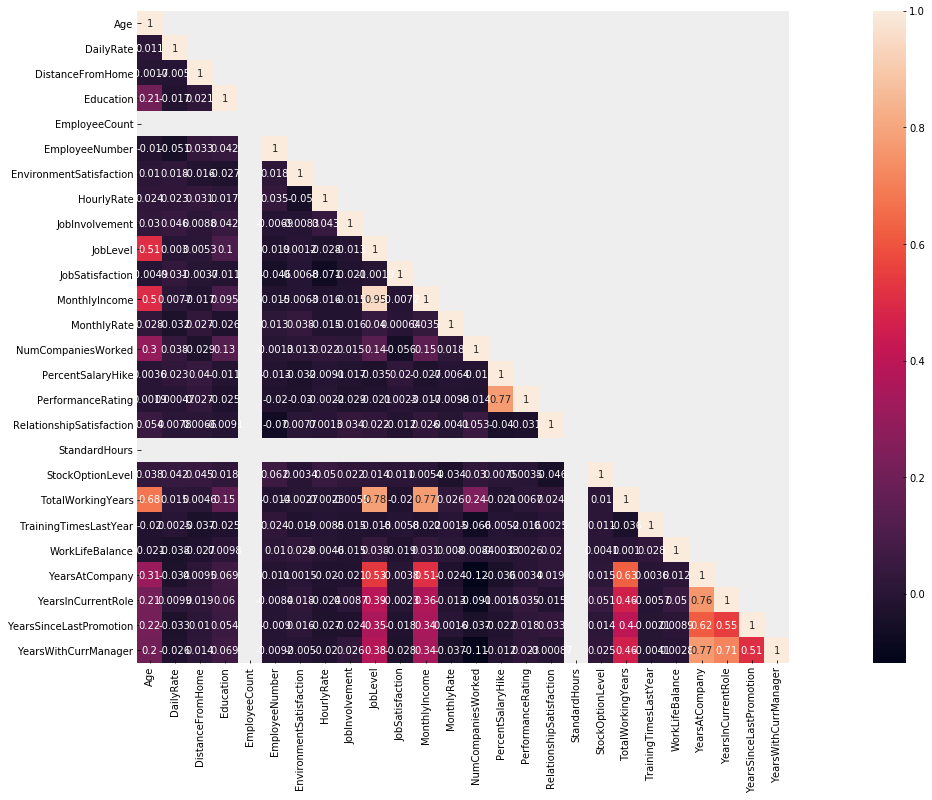

In [10]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

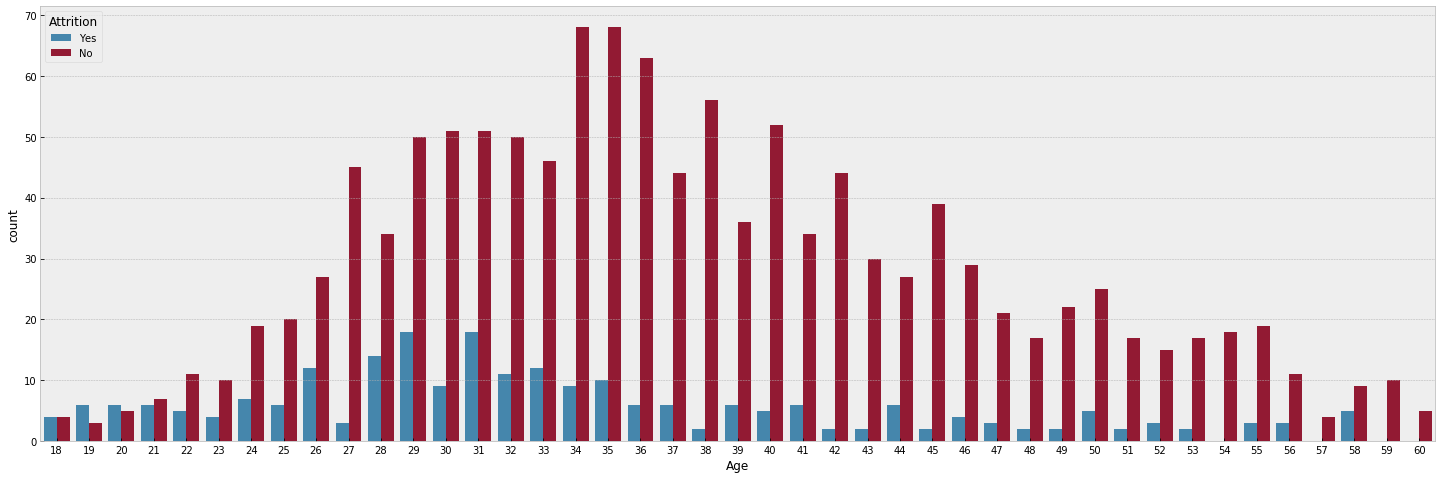

In [11]:

plt.figure(figsize=(25, 8))
sns.countplot(x='Age', hue='Attrition', data=df)

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


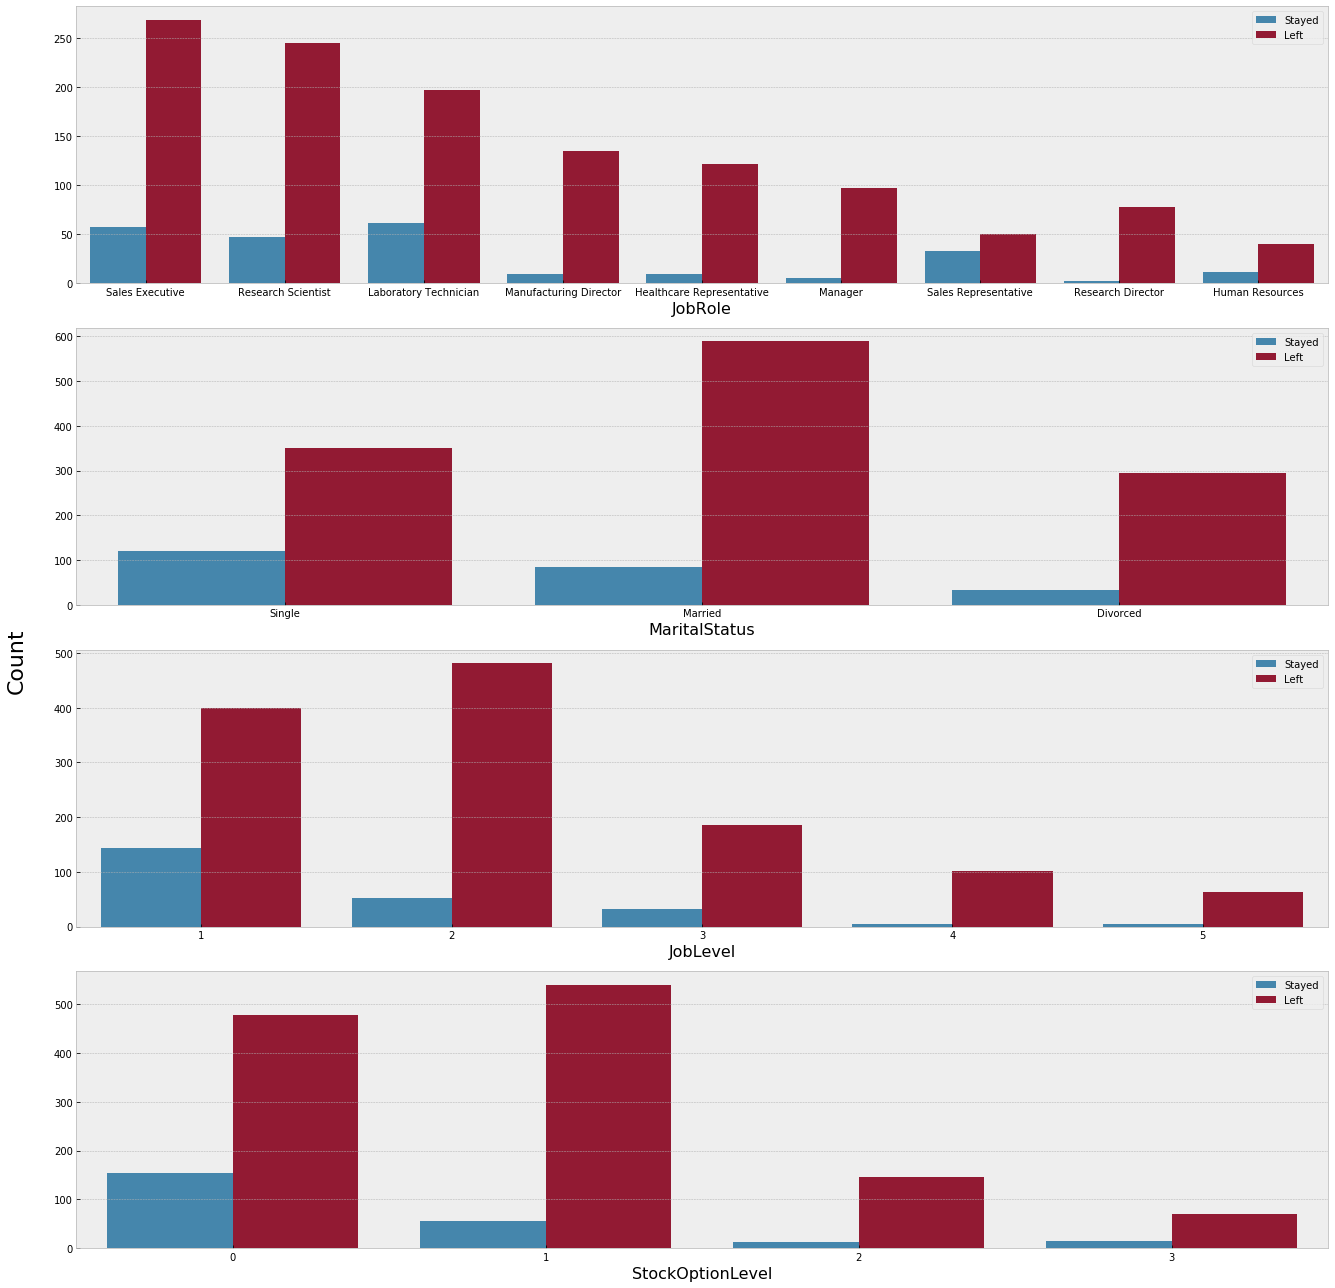

In [12]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)
x_vars = ['JobRole', 'MaritalStatus', 'JobLevel', 'StockOptionLevel']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Attrition', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)

plt.show()


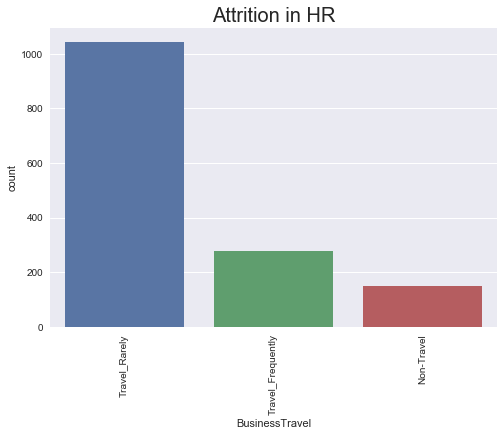

In [13]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

sns.countplot(df['BusinessTravel'])

plt.title('Attrition in HR', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

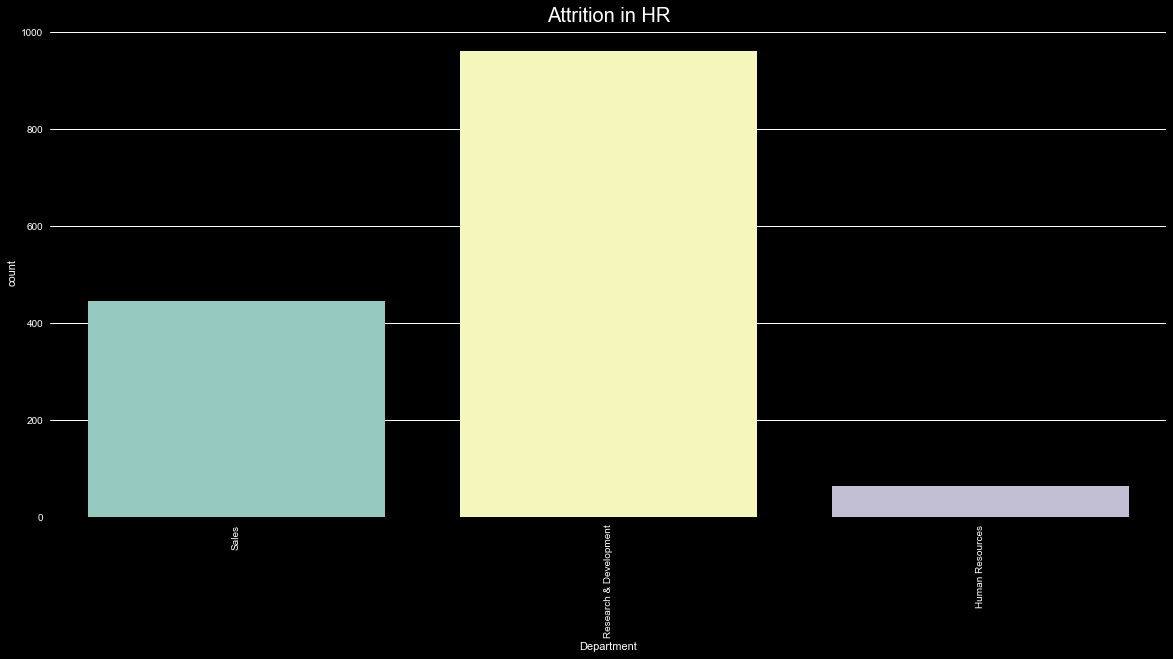

In [14]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['Department'])

plt.title('Attrition in HR', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

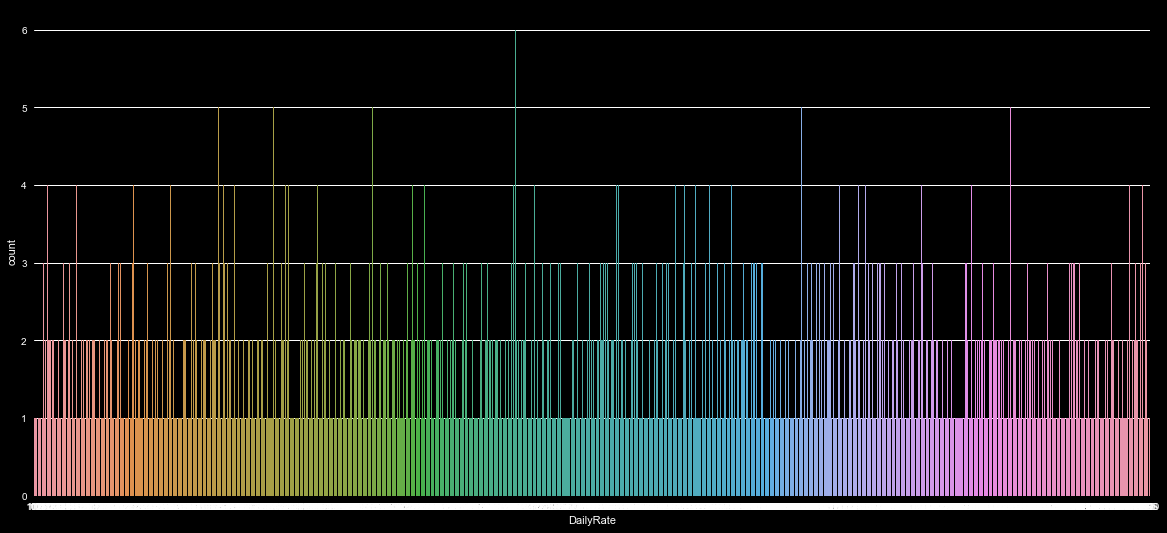

In [15]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['DailyRate'])



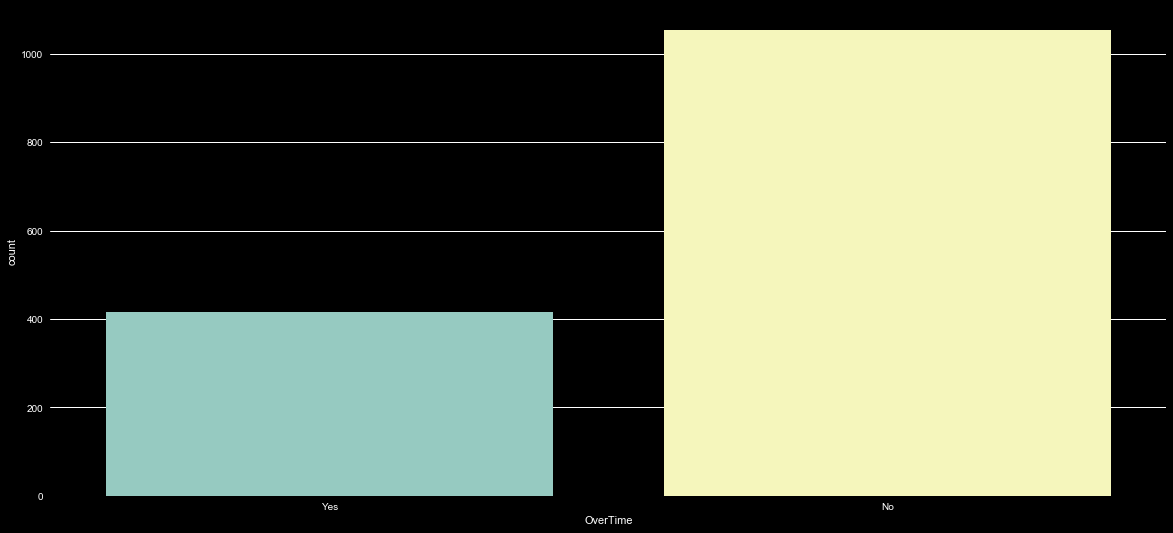

In [16]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['OverTime'])



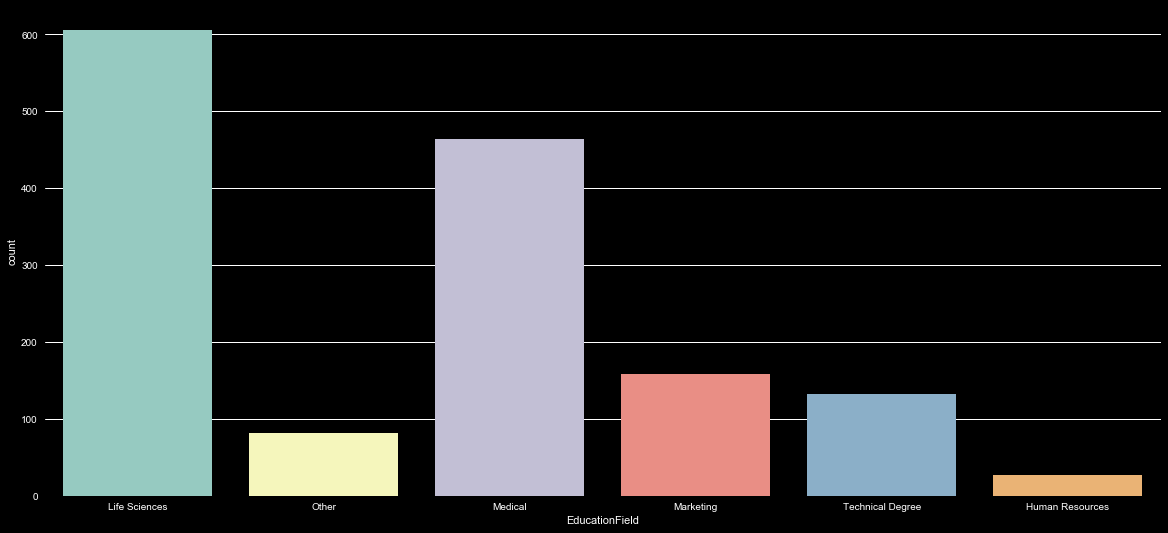

In [17]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fast')

sns.countplot(df['EducationField'])



3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


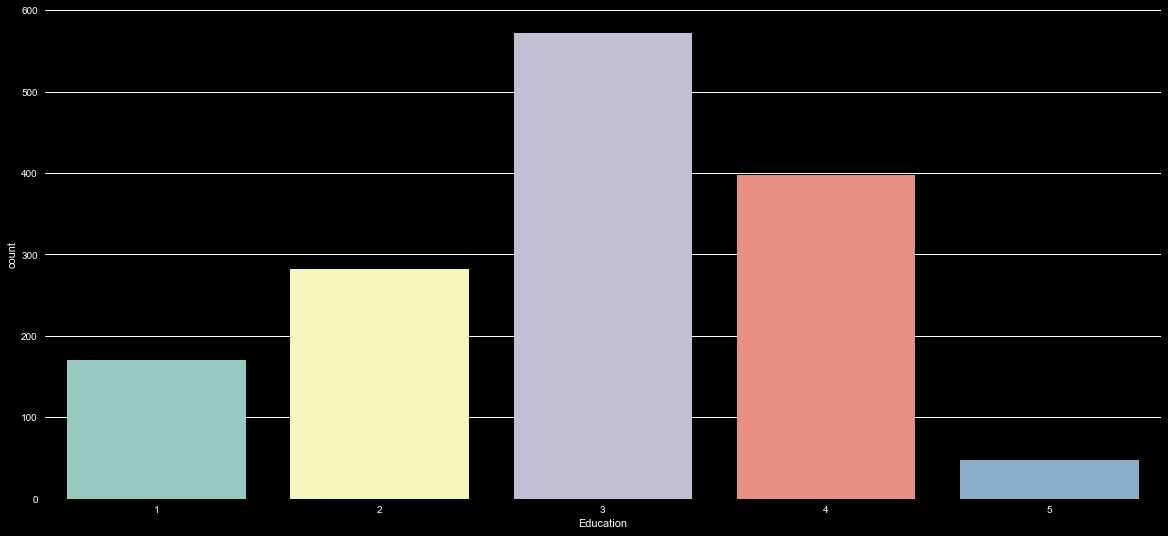

In [18]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fast')

sns.countplot(df['Education'])
print(df['Education'].value_counts())


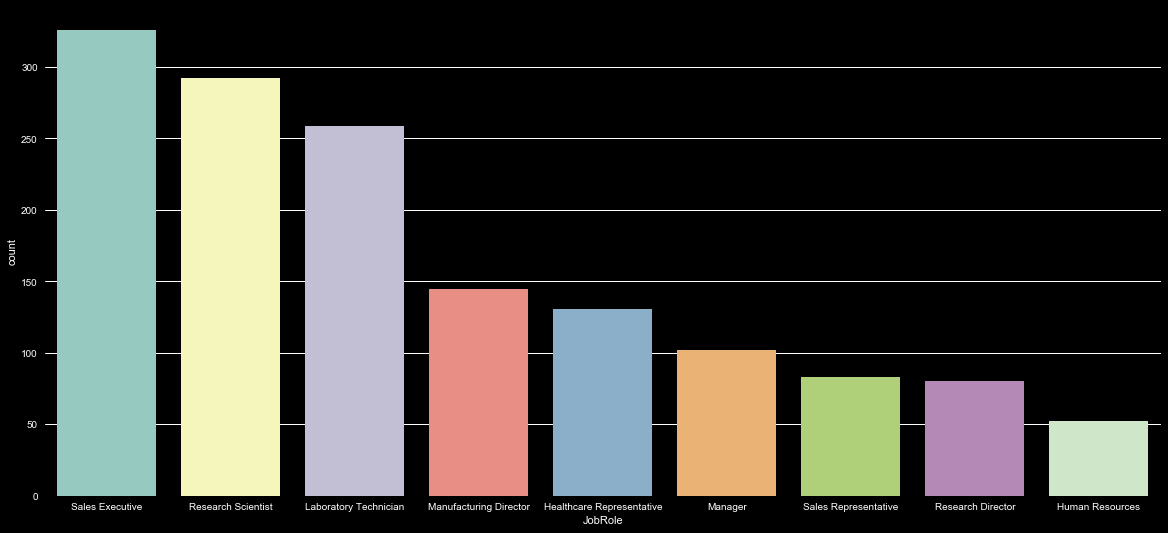

In [19]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fast')

sns.countplot(df['JobRole'])


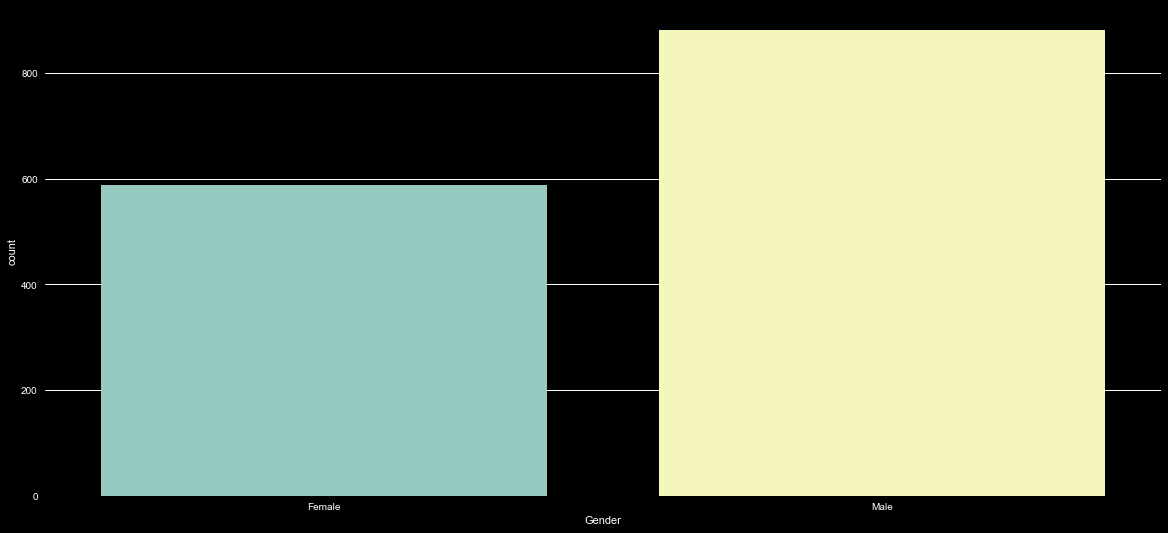

In [20]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fast')

sns.countplot(df['Gender'])

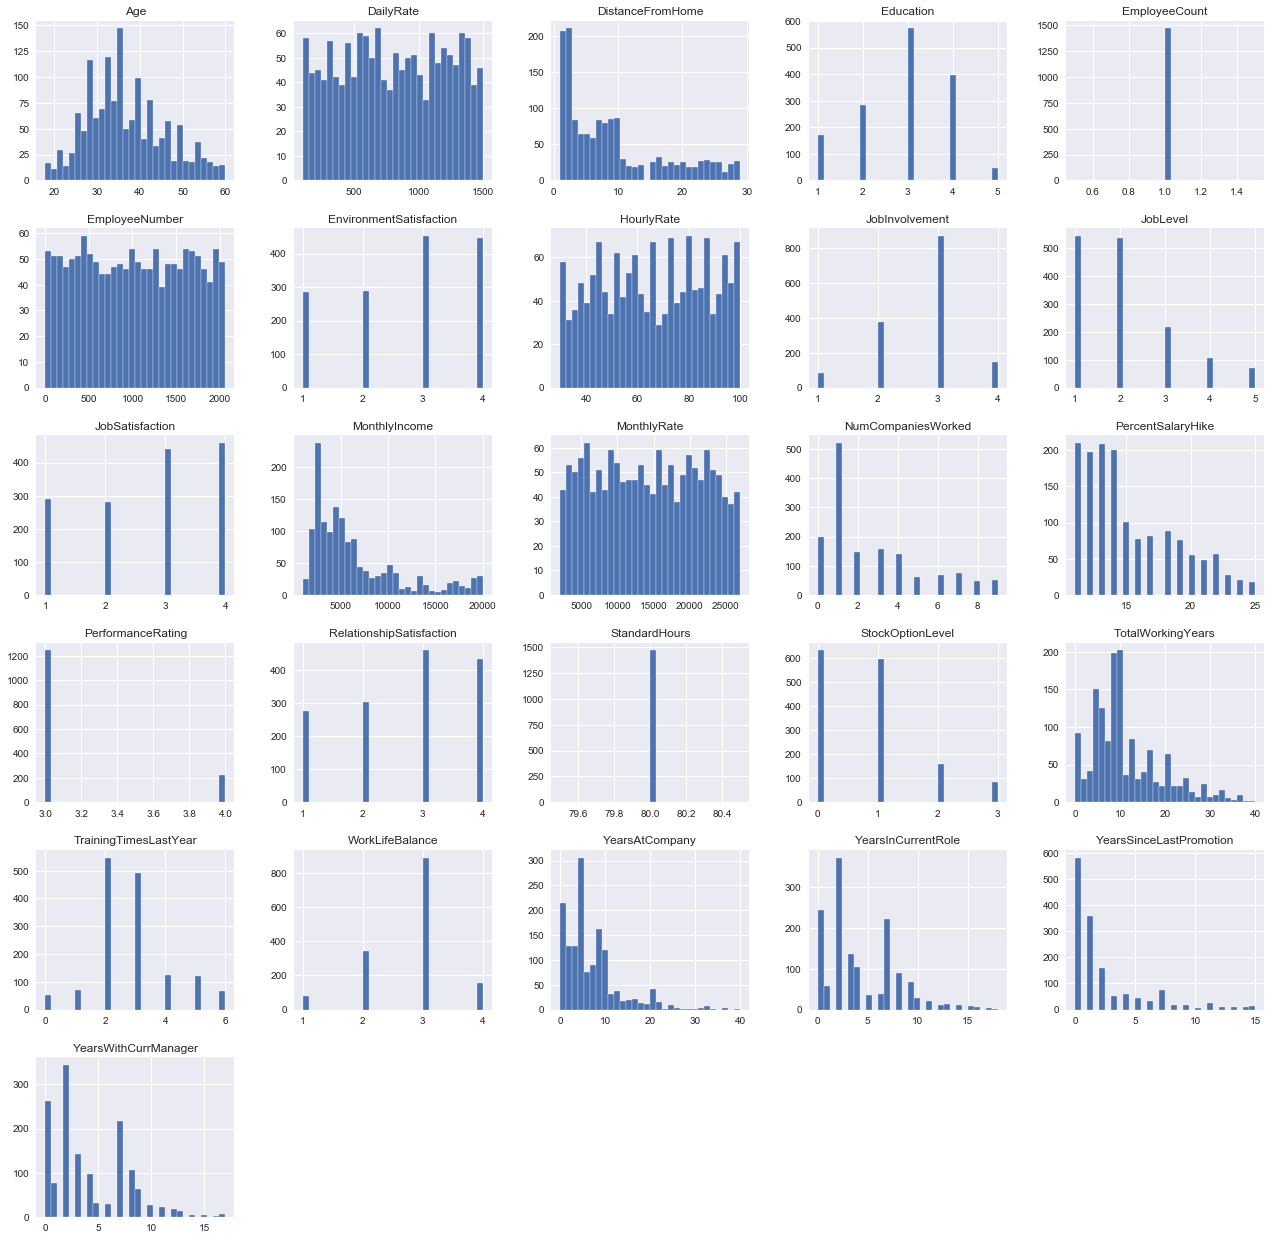

In [21]:
plt.style.use('seaborn')

df.hist(bins=30, figsize=(22,22), edgecolor='w')

plt.show()

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\GT\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


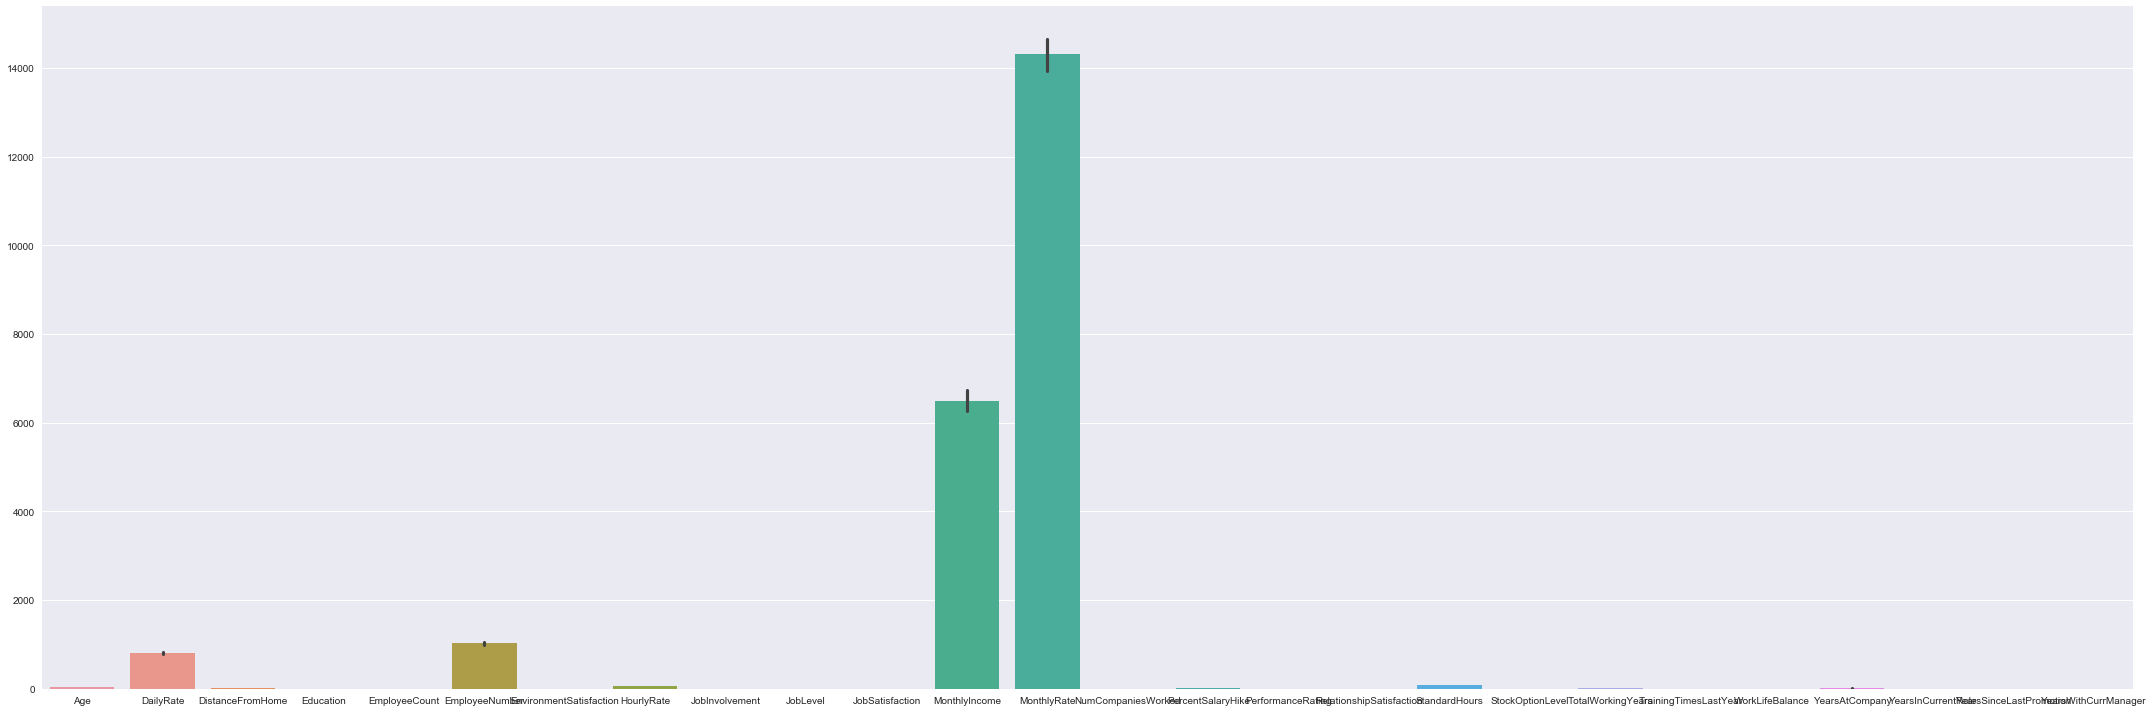

In [22]:
sns.factorplot(data=df,kind='bar',size=10,aspect=3)

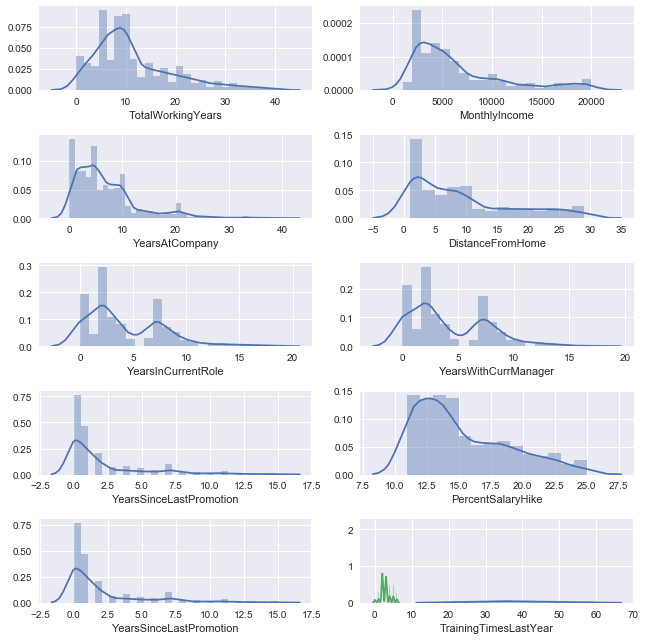

In [23]:
fig,ax = plt.subplots(5,2, figsize=(9,9))   
sns.distplot(df['Age'])
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

In [24]:

columns = df.select_dtypes(include='object').columns
for col in columns:
    df[col] = LabelEncoder().fit_transform(df[col])
    
df = pd.get_dummies(df)
    
del columns
gc.collect();

NameError: name 'gc' is not defined

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [26]:
ddf=df.select_dtypes(include='object')
ddf.columns

Index([], dtype='object')

In [27]:
for col in ddf.columns:
    transform(col)

In [28]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].as_matrix()

C:\Users\GT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [30]:
Xt=SMOTE(random_state=42)
x_train_smote,  y_train_smote = Xt.fit_sample(x_train,y_train)

In [31]:
def compare(model):
    z=model
    z.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test)) 

In [37]:
acc=[]
prec=[]
rec=[]
auroc=[]
HR=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier']

for model in range(len(HR)):
    compare(HR[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
mf=pd.DataFrame(d)
mf

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.872283,0.458333,0.511628,0.715814
1,RandomForestClassifier,0.872283,0.187500,0.529412,0.709150
2,GradientBoostingClassifier,0.891304,0.375000,0.642857,0.777311
